In \[34\]:

    import pandas as pd
    import numpy as np
    from sklearn.linear_model import LinearRegression 
    import seaborn as sb
    import matplotlib.pyplot as mp
    #from sklearn.linear_model import  
    from sklearn.model_selection import train_test_split

In \[2\]:

    df= pd.read_csv("BostonHousing.csv")

In \[3\]:

    df.head()

Out\[3\]:

|     | crim    | zn   | indus | chas | nox   | rm    | age  | dis    | rad | tax | ptratio | b      | lstat | medv |
|-----|---------|------|-------|------|-------|-------|------|--------|-----|-----|---------|--------|-------|------|
| 0   | 0.00632 | 18.0 | 2.31  | 0    | 0.538 | 6.575 | 65.2 | 4.0900 | 1   | 296 | 15.3    | 396.90 | 4.98  | 24.0 |
| 1   | 0.02731 | 0.0  | 7.07  | 0    | 0.469 | 6.421 | 78.9 | 4.9671 | 2   | 242 | 17.8    | 396.90 | 9.14  | 21.6 |
| 2   | 0.02729 | 0.0  | 7.07  | 0    | 0.469 | 7.185 | 61.1 | 4.9671 | 2   | 242 | 17.8    | 392.83 | 4.03  | 34.7 |
| 3   | 0.03237 | 0.0  | 2.18  | 0    | 0.458 | 6.998 | 45.8 | 6.0622 | 3   | 222 | 18.7    | 394.63 | 2.94  | 33.4 |
| 4   | 0.06905 | 0.0  | 2.18  | 0    | 0.458 | 7.147 | 54.2 | 6.0622 | 3   | 222 | 18.7    | 396.90 | 5.33  | 36.2 |

In \[4\]:

    df.tail()

Out\[4\]:

|     | crim    | zn  | indus | chas | nox   | rm    | age  | dis    | rad | tax | ptratio | b      | lstat | medv |
|-----|---------|-----|-------|------|-------|-------|------|--------|-----|-----|---------|--------|-------|------|
| 501 | 0.06263 | 0.0 | 11.93 | 0    | 0.573 | 6.593 | 69.1 | 2.4786 | 1   | 273 | 21.0    | 391.99 | 9.67  | 22.4 |
| 502 | 0.04527 | 0.0 | 11.93 | 0    | 0.573 | 6.120 | 76.7 | 2.2875 | 1   | 273 | 21.0    | 396.90 | 9.08  | 20.6 |
| 503 | 0.06076 | 0.0 | 11.93 | 0    | 0.573 | 6.976 | 91.0 | 2.1675 | 1   | 273 | 21.0    | 396.90 | 5.64  | 23.9 |
| 504 | 0.10959 | 0.0 | 11.93 | 0    | 0.573 | 6.794 | 89.3 | 2.3889 | 1   | 273 | 21.0    | 393.45 | 6.48  | 22.0 |
| 505 | 0.04741 | 0.0 | 11.93 | 0    | 0.573 | 6.030 | 80.8 | 2.5050 | 1   | 273 | 21.0    | 396.90 | 7.88  | 11.9 |

In \[5\]:

    df.describe()

Out\[5\]:

|       | crim       | zn         | indus      | chas       | nox        | rm         | age        | dis        | rad        | tax        | ptratio    | b          | lstat      | medv       |
|-------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|------------|
| count | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 | 506.000000 |
| mean  | 3.613524   | 11.363636  | 11.136779  | 0.069170   | 0.554695   | 6.284634   | 68.574901  | 3.795043   | 9.549407   | 408.237154 | 18.455534  | 356.674032 | 12.653063  | 22.532806  |
| std   | 8.601545   | 23.322453  | 6.860353   | 0.253994   | 0.115878   | 0.702617   | 28.148861  | 2.105710   | 8.707259   | 168.537116 | 2.164946   | 91.294864  | 7.141062   | 9.197104   |
| min   | 0.006320   | 0.000000   | 0.460000   | 0.000000   | 0.385000   | 3.561000   | 2.900000   | 1.129600   | 1.000000   | 187.000000 | 12.600000  | 0.320000   | 1.730000   | 5.000000   |
| 25%   | 0.082045   | 0.000000   | 5.190000   | 0.000000   | 0.449000   | 5.885500   | 45.025000  | 2.100175   | 4.000000   | 279.000000 | 17.400000  | 375.377500 | 6.950000   | 17.025000  |
| 50%   | 0.256510   | 0.000000   | 9.690000   | 0.000000   | 0.538000   | 6.208500   | 77.500000  | 3.207450   | 5.000000   | 330.000000 | 19.050000  | 391.440000 | 11.360000  | 21.200000  |
| 75%   | 3.677082   | 12.500000  | 18.100000  | 0.000000   | 0.624000   | 6.623500   | 94.075000  | 5.188425   | 24.000000  | 666.000000 | 20.200000  | 396.225000 | 16.955000  | 25.000000  |
| max   | 88.976200  | 100.000000 | 27.740000  | 1.000000   | 0.871000   | 8.780000   | 100.000000 | 12.126500  | 24.000000  | 711.000000 | 22.000000  | 396.900000 | 37.970000  | 50.000000  |

In \[6\]:

    df.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 506 entries, 0 to 505
    Data columns (total 14 columns):
    crim       506 non-null float64
    zn         506 non-null float64
    indus      506 non-null float64
    chas       506 non-null int64
    nox        506 non-null float64
    rm         506 non-null float64
    age        506 non-null float64
    dis        506 non-null float64
    rad        506 non-null int64
    tax        506 non-null int64
    ptratio    506 non-null float64
    b          506 non-null float64
    lstat      506 non-null float64
    medv       506 non-null float64
    dtypes: float64(11), int64(3)
    memory usage: 55.4 KB

In \[14\]:

    df.shape

Out\[14\]:

    (506, 14)

In \[21\]:

    df_binary50 = df[:][:50]

In \[22\]:

    df_binary50

Out\[22\]:

|     | crim    | zn   | indus | chas | nox   | rm    | age   | dis    | rad | tax | ptratio | b      | lstat | medv |
|-----|---------|------|-------|------|-------|-------|-------|--------|-----|-----|---------|--------|-------|------|
| 0   | 0.00632 | 18.0 | 2.31  | 0    | 0.538 | 6.575 | 65.2  | 4.0900 | 1   | 296 | 15.3    | 396.90 | 4.98  | 24.0 |
| 1   | 0.02731 | 0.0  | 7.07  | 0    | 0.469 | 6.421 | 78.9  | 4.9671 | 2   | 242 | 17.8    | 396.90 | 9.14  | 21.6 |
| 2   | 0.02729 | 0.0  | 7.07  | 0    | 0.469 | 7.185 | 61.1  | 4.9671 | 2   | 242 | 17.8    | 392.83 | 4.03  | 34.7 |
| 3   | 0.03237 | 0.0  | 2.18  | 0    | 0.458 | 6.998 | 45.8  | 6.0622 | 3   | 222 | 18.7    | 394.63 | 2.94  | 33.4 |
| 4   | 0.06905 | 0.0  | 2.18  | 0    | 0.458 | 7.147 | 54.2  | 6.0622 | 3   | 222 | 18.7    | 396.90 | 5.33  | 36.2 |
| 5   | 0.02985 | 0.0  | 2.18  | 0    | 0.458 | 6.430 | 58.7  | 6.0622 | 3   | 222 | 18.7    | 394.12 | 5.21  | 28.7 |
| 6   | 0.08829 | 12.5 | 7.87  | 0    | 0.524 | 6.012 | 66.6  | 5.5605 | 5   | 311 | 15.2    | 395.60 | 12.43 | 22.9 |
| 7   | 0.14455 | 12.5 | 7.87  | 0    | 0.524 | 6.172 | 96.1  | 5.9505 | 5   | 311 | 15.2    | 396.90 | 19.15 | 27.1 |
| 8   | 0.21124 | 12.5 | 7.87  | 0    | 0.524 | 5.631 | 100.0 | 6.0821 | 5   | 311 | 15.2    | 386.63 | 29.93 | 16.5 |
| 9   | 0.17004 | 12.5 | 7.87  | 0    | 0.524 | 6.004 | 85.9  | 6.5921 | 5   | 311 | 15.2    | 386.71 | 17.10 | 18.9 |
| 10  | 0.22489 | 12.5 | 7.87  | 0    | 0.524 | 6.377 | 94.3  | 6.3467 | 5   | 311 | 15.2    | 392.52 | 20.45 | 15.0 |
| 11  | 0.11747 | 12.5 | 7.87  | 0    | 0.524 | 6.009 | 82.9  | 6.2267 | 5   | 311 | 15.2    | 396.90 | 13.27 | 18.9 |
| 12  | 0.09378 | 12.5 | 7.87  | 0    | 0.524 | 5.889 | 39.0  | 5.4509 | 5   | 311 | 15.2    | 390.50 | 15.71 | 21.7 |
| 13  | 0.62976 | 0.0  | 8.14  | 0    | 0.538 | 5.949 | 61.8  | 4.7075 | 4   | 307 | 21.0    | 396.90 | 8.26  | 20.4 |
| 14  | 0.63796 | 0.0  | 8.14  | 0    | 0.538 | 6.096 | 84.5  | 4.4619 | 4   | 307 | 21.0    | 380.02 | 10.26 | 18.2 |
| 15  | 0.62739 | 0.0  | 8.14  | 0    | 0.538 | 5.834 | 56.5  | 4.4986 | 4   | 307 | 21.0    | 395.62 | 8.47  | 19.9 |
| 16  | 1.05393 | 0.0  | 8.14  | 0    | 0.538 | 5.935 | 29.3  | 4.4986 | 4   | 307 | 21.0    | 386.85 | 6.58  | 23.1 |
| 17  | 0.78420 | 0.0  | 8.14  | 0    | 0.538 | 5.990 | 81.7  | 4.2579 | 4   | 307 | 21.0    | 386.75 | 14.67 | 17.5 |
| 18  | 0.80271 | 0.0  | 8.14  | 0    | 0.538 | 5.456 | 36.6  | 3.7965 | 4   | 307 | 21.0    | 288.99 | 11.69 | 20.2 |
| 19  | 0.72580 | 0.0  | 8.14  | 0    | 0.538 | 5.727 | 69.5  | 3.7965 | 4   | 307 | 21.0    | 390.95 | 11.28 | 18.2 |
| 20  | 1.25179 | 0.0  | 8.14  | 0    | 0.538 | 5.570 | 98.1  | 3.7979 | 4   | 307 | 21.0    | 376.57 | 21.02 | 13.6 |
| 21  | 0.85204 | 0.0  | 8.14  | 0    | 0.538 | 5.965 | 89.2  | 4.0123 | 4   | 307 | 21.0    | 392.53 | 13.83 | 19.6 |
| 22  | 1.23247 | 0.0  | 8.14  | 0    | 0.538 | 6.142 | 91.7  | 3.9769 | 4   | 307 | 21.0    | 396.90 | 18.72 | 15.2 |
| 23  | 0.98843 | 0.0  | 8.14  | 0    | 0.538 | 5.813 | 100.0 | 4.0952 | 4   | 307 | 21.0    | 394.54 | 19.88 | 14.5 |
| 24  | 0.75026 | 0.0  | 8.14  | 0    | 0.538 | 5.924 | 94.1  | 4.3996 | 4   | 307 | 21.0    | 394.33 | 16.30 | 15.6 |
| 25  | 0.84054 | 0.0  | 8.14  | 0    | 0.538 | 5.599 | 85.7  | 4.4546 | 4   | 307 | 21.0    | 303.42 | 16.51 | 13.9 |
| 26  | 0.67191 | 0.0  | 8.14  | 0    | 0.538 | 5.813 | 90.3  | 4.6820 | 4   | 307 | 21.0    | 376.88 | 14.81 | 16.6 |
| 27  | 0.95577 | 0.0  | 8.14  | 0    | 0.538 | 6.047 | 88.8  | 4.4534 | 4   | 307 | 21.0    | 306.38 | 17.28 | 14.8 |
| 28  | 0.77299 | 0.0  | 8.14  | 0    | 0.538 | 6.495 | 94.4  | 4.4547 | 4   | 307 | 21.0    | 387.94 | 12.80 | 18.4 |
| 29  | 1.00245 | 0.0  | 8.14  | 0    | 0.538 | 6.674 | 87.3  | 4.2390 | 4   | 307 | 21.0    | 380.23 | 11.98 | 21.0 |
| 30  | 1.13081 | 0.0  | 8.14  | 0    | 0.538 | 5.713 | 94.1  | 4.2330 | 4   | 307 | 21.0    | 360.17 | 22.60 | 12.7 |
| 31  | 1.35472 | 0.0  | 8.14  | 0    | 0.538 | 6.072 | 100.0 | 4.1750 | 4   | 307 | 21.0    | 376.73 | 13.04 | 14.5 |
| 32  | 1.38799 | 0.0  | 8.14  | 0    | 0.538 | 5.950 | 82.0  | 3.9900 | 4   | 307 | 21.0    | 232.60 | 27.71 | 13.2 |
| 33  | 1.15172 | 0.0  | 8.14  | 0    | 0.538 | 5.701 | 95.0  | 3.7872 | 4   | 307 | 21.0    | 358.77 | 18.35 | 13.1 |
| 34  | 1.61282 | 0.0  | 8.14  | 0    | 0.538 | 6.096 | 96.9  | 3.7598 | 4   | 307 | 21.0    | 248.31 | 20.34 | 13.5 |
| 35  | 0.06417 | 0.0  | 5.96  | 0    | 0.499 | 5.933 | 68.2  | 3.3603 | 5   | 279 | 19.2    | 396.90 | 9.68  | 18.9 |
| 36  | 0.09744 | 0.0  | 5.96  | 0    | 0.499 | 5.841 | 61.4  | 3.3779 | 5   | 279 | 19.2    | 377.56 | 11.41 | 20.0 |
| 37  | 0.08014 | 0.0  | 5.96  | 0    | 0.499 | 5.850 | 41.5  | 3.9342 | 5   | 279 | 19.2    | 396.90 | 8.77  | 21.0 |
| 38  | 0.17505 | 0.0  | 5.96  | 0    | 0.499 | 5.966 | 30.2  | 3.8473 | 5   | 279 | 19.2    | 393.43 | 10.13 | 24.7 |
| 39  | 0.02763 | 75.0 | 2.95  | 0    | 0.428 | 6.595 | 21.8  | 5.4011 | 3   | 252 | 18.3    | 395.63 | 4.32  | 30.8 |
| 40  | 0.03359 | 75.0 | 2.95  | 0    | 0.428 | 7.024 | 15.8  | 5.4011 | 3   | 252 | 18.3    | 395.62 | 1.98  | 34.9 |
| 41  | 0.12744 | 0.0  | 6.91  | 0    | 0.448 | 6.770 | 2.9   | 5.7209 | 3   | 233 | 17.9    | 385.41 | 4.84  | 26.6 |
| 42  | 0.14150 | 0.0  | 6.91  | 0    | 0.448 | 6.169 | 6.6   | 5.7209 | 3   | 233 | 17.9    | 383.37 | 5.81  | 25.3 |
| 43  | 0.15936 | 0.0  | 6.91  | 0    | 0.448 | 6.211 | 6.5   | 5.7209 | 3   | 233 | 17.9    | 394.46 | 7.44  | 24.7 |
| 44  | 0.12269 | 0.0  | 6.91  | 0    | 0.448 | 6.069 | 40.0  | 5.7209 | 3   | 233 | 17.9    | 389.39 | 9.55  | 21.2 |
| 45  | 0.17142 | 0.0  | 6.91  | 0    | 0.448 | 5.682 | 33.8  | 5.1004 | 3   | 233 | 17.9    | 396.90 | 10.21 | 19.3 |
| 46  | 0.18836 | 0.0  | 6.91  | 0    | 0.448 | 5.786 | 33.3  | 5.1004 | 3   | 233 | 17.9    | 396.90 | 14.15 | 20.0 |
| 47  | 0.22927 | 0.0  | 6.91  | 0    | 0.448 | 6.030 | 85.5  | 5.6894 | 3   | 233 | 17.9    | 392.74 | 18.80 | 16.6 |
| 48  | 0.25387 | 0.0  | 6.91  | 0    | 0.448 | 5.399 | 95.3  | 5.8700 | 3   | 233 | 17.9    | 396.90 | 30.81 | 14.4 |
| 49  | 0.21977 | 0.0  | 6.91  | 0    | 0.448 | 5.602 | 62.0  | 6.0877 | 3   | 233 | 17.9    | 396.90 | 16.20 | 19.4 |

In \[26\]:

    df_binary50.isnull()

Out\[26\]:

|     | crim  | zn    | indus | chas  | nox   | rm    | age   | dis   | rad   | tax   | ptratio | b     | lstat | medv  |
|-----|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|---------|-------|-------|-------|
| 0   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 1   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 2   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 3   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 4   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 5   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 6   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 7   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 8   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 9   | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 10  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 11  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 12  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 13  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 14  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 15  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 16  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 17  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 18  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 19  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 20  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 21  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 22  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 23  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 24  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 25  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 26  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 27  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 28  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 29  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 30  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 31  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 32  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 33  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 34  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 35  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 36  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 37  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 38  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 39  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 40  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 41  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 42  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 43  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 44  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 45  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 46  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 47  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 48  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |
| 49  | False | False | False | False | False | False | False | False | False | False | False   | False | False | False |

In \[27\]:

    df_binary50.isnull().sum()

Out\[27\]:

    crim       0
    zn         0
    indus      0
    chas       0
    nox        0
    rm         0
    age        0
    dis        0
    rad        0
    tax        0
    ptratio    0
    b          0
    lstat      0
    medv       0
    dtype: int64

In \[29\]:

    df_binary50[['age','tax']]

Out\[29\]:

|     | age   | tax |
|-----|-------|-----|
| 0   | 65.2  | 296 |
| 1   | 78.9  | 242 |
| 2   | 61.1  | 242 |
| 3   | 45.8  | 222 |
| 4   | 54.2  | 222 |
| 5   | 58.7  | 222 |
| 6   | 66.6  | 311 |
| 7   | 96.1  | 311 |
| 8   | 100.0 | 311 |
| 9   | 85.9  | 311 |
| 10  | 94.3  | 311 |
| 11  | 82.9  | 311 |
| 12  | 39.0  | 311 |
| 13  | 61.8  | 307 |
| 14  | 84.5  | 307 |
| 15  | 56.5  | 307 |
| 16  | 29.3  | 307 |
| 17  | 81.7  | 307 |
| 18  | 36.6  | 307 |
| 19  | 69.5  | 307 |
| 20  | 98.1  | 307 |
| 21  | 89.2  | 307 |
| 22  | 91.7  | 307 |
| 23  | 100.0 | 307 |
| 24  | 94.1  | 307 |
| 25  | 85.7  | 307 |
| 26  | 90.3  | 307 |
| 27  | 88.8  | 307 |
| 28  | 94.4  | 307 |
| 29  | 87.3  | 307 |
| 30  | 94.1  | 307 |
| 31  | 100.0 | 307 |
| 32  | 82.0  | 307 |
| 33  | 95.0  | 307 |
| 34  | 96.9  | 307 |
| 35  | 68.2  | 279 |
| 36  | 61.4  | 279 |
| 37  | 41.5  | 279 |
| 38  | 30.2  | 279 |
| 39  | 21.8  | 252 |
| 40  | 15.8  | 252 |
| 41  | 2.9   | 233 |
| 42  | 6.6   | 233 |
| 43  | 6.5   | 233 |
| 44  | 40.0  | 233 |
| 45  | 33.8  | 233 |
| 46  | 33.3  | 233 |
| 47  | 85.5  | 233 |
| 48  | 95.3  | 233 |
| 49  | 62.0  | 233 |

In \[30\]:

    sb.scatterplot(x='age',y='tax',data=df_binary50)

Out\[30\]:

    <matplotlib.axes._subplots.AxesSubplot at 0x27b3393b668>

![](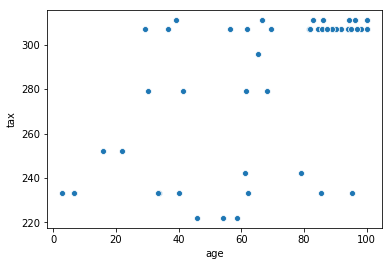%0A)

In \[31\]:

    df_binary50.head()

Out\[31\]:

|     | crim    | zn   | indus | chas | nox   | rm    | age  | dis    | rad | tax | ptratio | b      | lstat | medv |
|-----|---------|------|-------|------|-------|-------|------|--------|-----|-----|---------|--------|-------|------|
| 0   | 0.00632 | 18.0 | 2.31  | 0    | 0.538 | 6.575 | 65.2 | 4.0900 | 1   | 296 | 15.3    | 396.90 | 4.98  | 24.0 |
| 1   | 0.02731 | 0.0  | 7.07  | 0    | 0.469 | 6.421 | 78.9 | 4.9671 | 2   | 242 | 17.8    | 396.90 | 9.14  | 21.6 |
| 2   | 0.02729 | 0.0  | 7.07  | 0    | 0.469 | 7.185 | 61.1 | 4.9671 | 2   | 242 | 17.8    | 392.83 | 4.03  | 34.7 |
| 3   | 0.03237 | 0.0  | 2.18  | 0    | 0.458 | 6.998 | 45.8 | 6.0622 | 3   | 222 | 18.7    | 394.63 | 2.94  | 33.4 |
| 4   | 0.06905 | 0.0  | 2.18  | 0    | 0.458 | 7.147 | 54.2 | 6.0622 | 3   | 222 | 18.7    | 396.90 | 5.33  | 36.2 |

In \[36\]:

    x=np.array(df_binary50['age']).reshape(-1,1)
    y=np.array(df_binary50['tax']).reshape(-1,1)

In \[37\]:

    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25)

In \[38\]:

    lr=LinearRegression()

In \[39\]:

    lr.fit(x_train,y_train)

Out\[39\]:

    LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
             normalize=False)

In \[40\]:

    lr.score(x_train,y_train)

Out\[40\]:

    0.4249144893086732

In \[41\]:

    ypredict=lr.predict(x_test)

In \[43\]:

    mp.scatter(x_test,y_test,color='red')

Out\[43\]:

    <matplotlib.collections.PathCollection at 0x27b33ca8e80>

![](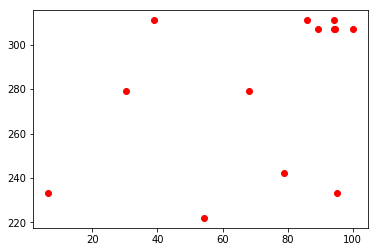%0A)

In \[46\]:

    mp.plot(x_test,ypredict,color='blue')

Out\[46\]:

    [<matplotlib.lines.Line2D at 0x27b33afbd68>]

![](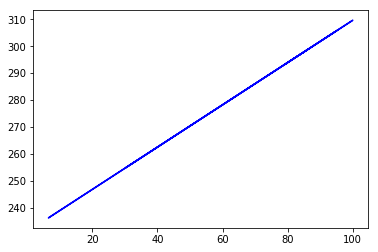%0A)

In \[47\]:

    df4=y_test

In \[48\]:

    df4

Out\[48\]:

    array([[233],
           [311],
           [307],
           [279],
           [222],
           [279],
           [307],
           [307],
           [233],
           [311],
           [311],
           [242],
           [307]], dtype=int64)

In \[49\]:

    df5 = ypredict
    df5

Out\[49\]:

    array([[305.94715906],
           [305.16257654],
           [305.24103479],
           [254.87083697],
           [273.70081746],
           [284.68497275],
           [309.63469691],
           [301.16120569],
           [236.27623123],
           [261.77516315],
           [298.57208337],
           [293.08000572],
           [305.00566004]])

In \[51\]:

    df_binary50.insert(1,'y_test',[305.94715906,
           305.16257654,
           305.24103479,
           254.87083697,
           273.70081746,
           284.68497275,
           309.63469691,
           301.16120569,
           236.27623123,
           261.77516315,
           298.57208337,
           293.08000572,
           305.00566004],True)

    ---------------------------------------------------------------------------
    ValueError                                Traceback (most recent call last)
    <ipython-input-51-0580c44a5f72> in <module>
         11        298.57208337,
         12        293.08000572,
    ---> 13        305.00566004],True)

    C:\ProgramData\Anaconda3\New folder\lib\site-packages\pandas\core\frame.py in insert(self, loc, column, value, allow_duplicates)
       3469         """
       3470         self._ensure_valid_index(value)
    -> 3471         value = self._sanitize_column(column, value, broadcast=False)
       3472         self._data.insert(loc, column, value,
       3473                           allow_duplicates=allow_duplicates)

    C:\ProgramData\Anaconda3\New folder\lib\site-packages\pandas\core\frame.py in _sanitize_column(self, key, value, broadcast)
       3628 
       3629             # turn me into an ndarray
    -> 3630             value = sanitize_index(value, self.index, copy=False)
       3631             if not isinstance(value, (np.ndarray, Index)):
       3632                 if isinstance(value, list) and len(value) > 0:

    C:\ProgramData\Anaconda3\New folder\lib\site-packages\pandas\core\internals\construction.py in sanitize_index(data, index, copy)
        517 
        518     if len(data) != len(index):
    --> 519         raise ValueError('Length of values does not match length of index')
        520 
        521     if isinstance(data, ABCIndexClass) and not copy:

    ValueError: Length of values does not match length of index

In \[ \]: